## Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

### The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

#### Other things to note:

Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.

For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. 

The third format provides information about several health issues through various awareness stalls.
Favorable outcome: For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.

In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100) # Display the Max Columns...

In [2]:
# Import the required dataset

train = pd.read_csv("Train.csv")
test = pd.read_csv("test_l0Auv8Q.csv")
first_hc = pd.read_csv("First_Health_Camp_Attended.csv")
second_hc = pd.read_csv("Second_Health_Camp_Attended.csv")
third_hc = pd.read_csv("Third_Health_Camp_Attended.csv")
hc_detail = pd.read_csv("Health_Camp_Detail.csv")
profile = pd.read_csv("Patient_Profile.csv")

In [3]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7


In [4]:
test.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0


In [5]:
first_hc.head(2)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN


In [6]:
second_hc.head(2)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700


In [7]:
third_hc.head(2)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1


In [8]:
hc_detail.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [9]:
profile.head(2)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry


In [10]:
# Combine the Train and Test Set
combined = pd.concat([train, test], ignore_index = True)

combined.shape, train.shape, test.shape

((110527, 8), (75278, 8), (35249, 8))

In [11]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


Merge/Join the All the Healthcamps Data with Combined Data

In [12]:
# Joining Health Camps Data with Combined Dataset

combined = pd.merge(combined, first_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")
combined = pd.merge(combined, second_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")
combined = pd.merge(combined, third_hc, on = ["Patient_ID", "Health_Camp_ID"], how = "left")

In [13]:
# Merging hc_detail with combined
combined = pd.merge(combined, hc_detail, on = ["Health_Camp_ID"], how = "left")

In [14]:
# Patient Profile
combined=pd.merge(combined, profile, on= ['Patient_ID'], how = "left")

In [15]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology


In [16]:
# Drop the Unnamed 4 Column
combined.drop("Unnamed: 4", axis = 1, inplace = True)

In [17]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology


In [18]:
# Combining all the Online Activity
combined["Online_Activity"] = combined.Online_Follower+combined.LinkedIn_Shared+\
combined.Twitter_Shared+combined.Facebook_Shared

In [19]:
# Online Activity
combined.Online_Activity.value_counts(normalize = True)

0    0.895166
2    0.035855
1    0.032363
3    0.027278
4    0.009337
Name: Online_Activity, dtype: float64

Challenge is that they see a high drop off between “Registration” and Number of people taking tests 

In [20]:
# Registration Date, Camp Start and End Date, First Interaction Date

combined['Registration_Date'] = pd.to_datetime(combined.Registration_Date, 
                                               dayfirst = True) # ddmmyy

# Camp Start Date
combined['Camp_Start_Date'] = pd.to_datetime(combined.Camp_Start_Date, 
                                               dayfirst = True) # ddmmyy

#Camp End Date
combined['Camp_End_Date'] = pd.to_datetime(combined.Camp_End_Date, 
                                               dayfirst = True) # ddmmyy

#First Interaction Date
combined['First_Interaction'] = pd.to_datetime(combined.First_Interaction, 
                                               dayfirst = True) # ddmmyy

In [21]:
# Interaction Days...
combined["Interaction_Days"] = (combined.Registration_Date - 
                                combined.First_Interaction).dt.days

In [22]:
combined.Interaction_Days.describe()

count    110193.000000
mean        249.117076
std         326.026614
min           0.000000
25%           8.000000
50%          77.000000
75%         420.000000
max        1543.000000
Name: Interaction_Days, dtype: float64

In [23]:
# Camp Duration
combined["Camp_Duration"] = np.abs((combined.Camp_End_Date - 
                                    combined.Camp_Start_Date).dt.days)

In [24]:
# Camp Start Date - Registration Date
combined["Headstart"] = np.abs((combined.Camp_Start_Date - 
                                combined.Registration_Date).dt.days)

In [25]:
# Camp End Date - Registration Date
combined["Camp_end_Reg_Duration"] = np.abs((combined.Camp_End_Date - 
                                combined.Registration_Date).dt.days)

In [26]:
# Registration Days
combined["Registration_Days"] = combined.Registration_Date.dt.day

# Registration Month
combined["Registration_Month"] = combined.Registration_Date.dt.month

# Registration Year
combined["Registration_Year"] = combined.Registration_Date.dt.year

In [27]:
# Camp Start Year & End Year
combined["Camp_Start_Year"] = combined.Camp_Start_Date.dt.year
combined["Camp_End_Year"] = combined.Camp_End_Date.dt.year

combined["Camp_Start_Month"] = combined.Camp_Start_Date.dt.month
combined["Camp_End_Month"] = combined.Camp_End_Date.dt.month

In [28]:
combined["Camp_Duration_Month"]= np.abs(combined.Camp_End_Month - 
                                        combined.Camp_Start_Month)

In [29]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2


* 10-Sept-2005 - 106 patients who registered
* Across all the Years, How many Patients Registered on 1-31 days.

In [30]:
# Unique No of Patients every day/month/year
combined.groupby("Registration_Date")["Patient_ID"].transform("nunique")

0         106.0
1         134.0
2          65.0
3         139.0
4          58.0
          ...  
110522     93.0
110523     70.0
110524    292.0
110525     57.0
110526    354.0
Name: Patient_ID, Length: 110527, dtype: float64

In [31]:
len(combined.loc[combined.Registration_Date=='2005-09-10', "Patient_ID"].unique())

106

In [32]:
# Unique No of Patients on the Registration Date
combined["Patient_Count_Reg_Date"] = combined.groupby("Registration_Date")\
["Patient_ID"].transform("nunique")

In [33]:
combined["Patient_Per_Day"]= combined.groupby("Registration_Days")\
["Patient_ID"].transform("nunique")

combined["Patient_Per_Month"]= combined.groupby("Registration_Month")\
["Patient_ID"].transform("nunique")

combined["Patient_Per_Year"]= combined.groupby("Registration_Year")\
["Patient_ID"].transform("nunique")

In [34]:
# Unique No of Health Camps Occurred during that Date
combined["Health_Camp_Count"] = combined.groupby("Registration_Date")\
["Health_Camp_ID"].transform("nunique")

In [35]:
# No of Patients in the Healthcamps

combined["Paient_HC_Count"] =combined.groupby("Health_Camp_ID")\
["Patient_ID"].transform("nunique")

In [36]:
# No of health Camp Happened every month
combined.loc[combined.Camp_End_Month==11, "Health_Camp_ID"].count()

# No of health Camp Happened every Year

23235

In [37]:
combined["Health_Camp_Month_FC"] = combined.groupby("Camp_End_Month")\
["Health_Camp_ID"].transform("nunique")

combined["Health_Camp_Year_FC"] = combined.groupby("Camp_End_Year")\
["Health_Camp_ID"].transform("nunique")

In [38]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0,0,0,None,None,None,2004-02-07,I,NaN,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14
4,521364,6529,2006-02-28,15,1,0,0,7,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,0,0,0,1,1,70,40,2003-07-04,I,Technology,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18


### Creating Target Variable

##### Favorable outcome:
* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.

In [39]:
# defined as getting a health_score - Yes/No
# visiting at least a stall - Yes or No
# 'Health_Score', 'Health Score','Number_of_stall_visited'

# If Health_Score>0 or Health Score > 0 or No of Stall Visited > 0, Last_Stall_Visited_Number > 0= 1 else 0

def tgt(first_hs, sec_hs, stall_visit, no_stall):
    if((first_hs>0) or (sec_hs>0) or (stall_visit>0) or (no_stall>0)):
        return(1)
    else:
        return(0)

In [40]:
combined["Target"] = combined.apply(lambda x:tgt(x["Health_Score"],
                           x["Health Score"],
                           x["Number_of_stall_visited"],
                           x["Last_Stall_Visited_Number"]),axis=1)

In [41]:
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [42]:
# Drop the Unwanted Vars.

new = combined.drop(["Donation", "Health_Score", "Health Score",
                    "Number_of_stall_visited", "Last_Stall_Visited_Number",
                    "Camp_Start_Date", "Camp_End_Date", "Registration_Date",
                    "Online_Follower", 
                     "LinkedIn_Shared", "Twitter_Shared",
                    "Facebook_Shared", "First_Interaction", 
                     "Patient_ID", "Health_Camp_ID"], axis = 1)

In [43]:
# Replace None with np.Nan
new.replace(to_replace = "None", value = np.NaN, inplace = True)

In [44]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,Third,G,2,NaN,NaN,NaN,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19,1
1,45,5,0,0,7,Third,G,2,1,75,40,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19,0
2,0,0,0,0,0,Second,A,2,NaN,NaN,NaN,NaN,NaN,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9,1
3,0,0,0,0,0,First,E,2,NaN,NaN,NaN,I,NaN,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14,0
4,15,1,0,0,7,Second,A,2,1,70,40,I,Technology,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18,1


<AxesSubplot:>

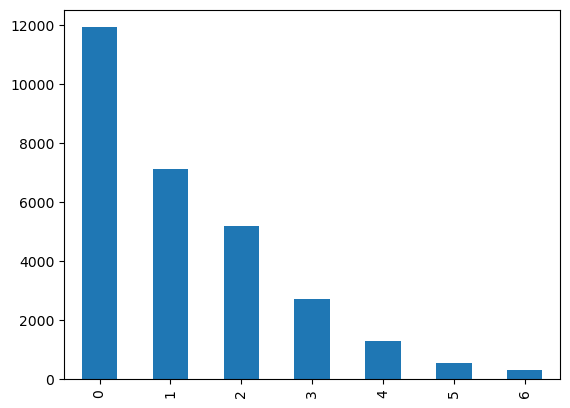

In [45]:
new.Income.value_counts().plot(kind = "bar")

In [46]:
pd.DataFrame(pd.factorize(new.Income)[0])[0].value_counts()

-1    81342
 1    11919
 0     7132
 4     5209
 5     2728
 3     1310
 6      566
 2      321
Name: 0, dtype: int64

In [47]:
new.loc[new.Income.isnull(), "Target"].value_counts()

0    68065
1    13277
Name: Target, dtype: int64

In [48]:
new.loc[new.Income.notnull(), "Target"].value_counts()

0    21928
1     7257
Name: Target, dtype: int64

In [49]:
# Apply Factorize to Convert the np.NAN to some Number
new["Income"] = pd.factorize(new.Income)[0]
new["Education_Score"] = pd.factorize(new.Education_Score)[0]
new["City_Type"] = pd.factorize(new.City_Type)[0]

In [50]:
new.Age.dropna().describe()

count     32602
unique       50
top          41
freq       2568
Name: Age, dtype: object

In [51]:
# Since Age is also categorical as per the above cell...we can factorize it
new["Age"] = pd.factorize(new.Age)[0]
new["Employer_Category"] = pd.factorize(new.Employer_Category)[0]

In [52]:
# Missing Value Columns
cols = new.isnull().sum()[new.isnull().sum()!=0].index

In [53]:
cols

Index(['Interaction_Days', 'Headstart', 'Camp_end_Reg_Duration',
       'Registration_Days', 'Registration_Month', 'Registration_Year',
       'Patient_Count_Reg_Date', 'Patient_Per_Day', 'Patient_Per_Month',
       'Patient_Per_Year', 'Health_Camp_Count'],
      dtype='object')

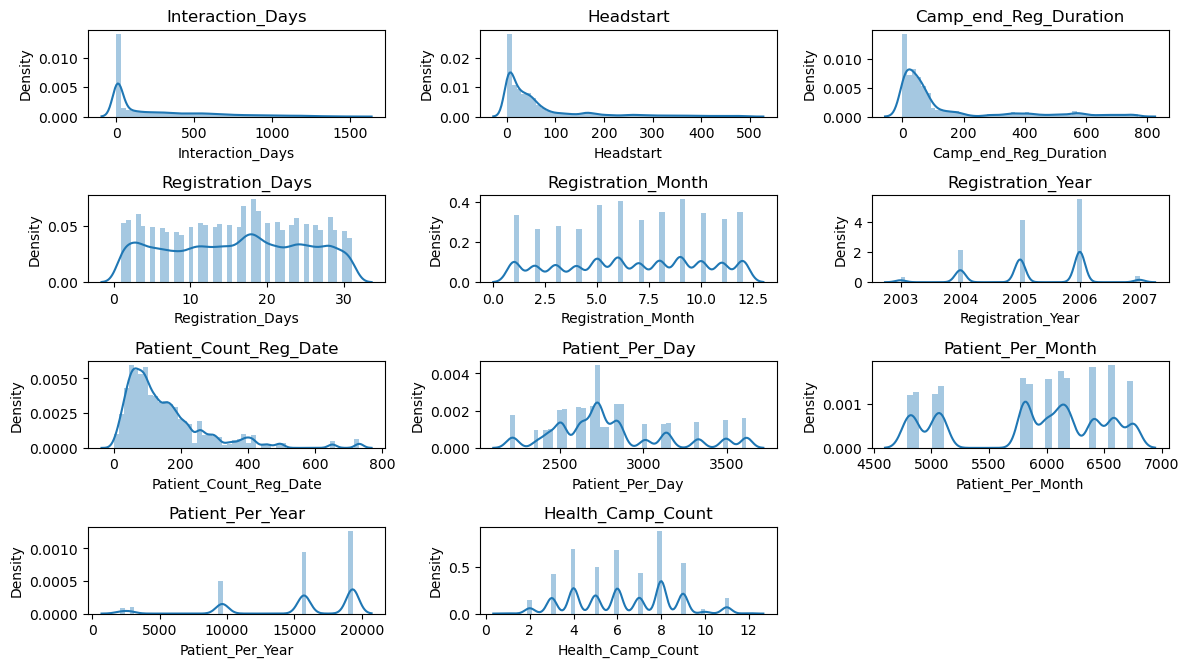

In [54]:
# Loop to impute the Missing Values using Median
nrows = 5
ncols = 3
rep = 1

plt.figure(figsize = (12, 8))
for i in cols:
    plt.subplot(nrows, ncols, rep)
    sns.distplot(new.loc[:, i])
    plt.title(i)
    rep = rep+1
    
plt.tight_layout()
plt.show()

In [55]:
# Imputting the Median
for i in cols:
    new.loc[:, i].fillna(new.loc[:, i].median(), inplace = True)

In [56]:
new.isnull().sum().sum()

0

In [57]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_end_Reg_Duration,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Count_Reg_Date,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Health_Camp_Count,Paient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,Third,G,2,-1,-1,-1,-1,-1,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,106.0,2649.0,6585.0,15710.0,4.0,2837,5,19,1
1,45,5,0,0,7,Third,G,2,0,0,0,0,0,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,134.0,3620.0,5804.0,15710.0,6.0,2837,5,19,0
2,0,0,0,0,0,Second,A,2,-1,-1,-1,-1,-1,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,65.0,2518.0,4785.0,19318.0,4.0,3597,8,9,1
3,0,0,0,0,0,First,E,2,-1,-1,-1,1,-1,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,139.0,2363.0,5029.0,9646.0,3.0,1882,6,14,0
4,15,1,0,0,7,Second,A,2,0,1,0,1,1,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,58.0,3012.0,5029.0,19318.0,6.0,3823,5,18,1


<AxesSubplot:>

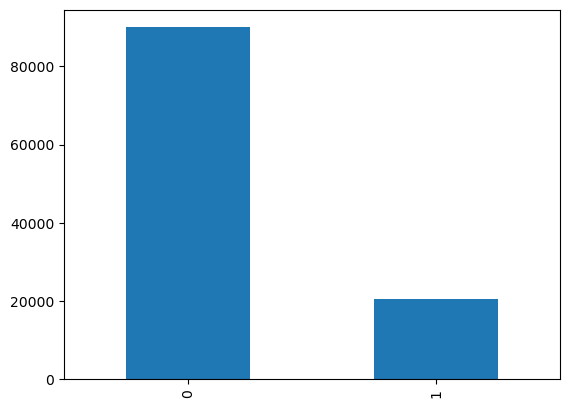

In [58]:
# Check our Target Variable

new.Target.value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Category2'>

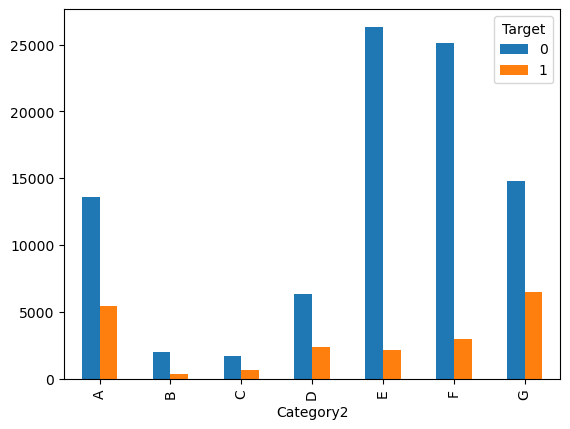

In [59]:
# Checking Pattern between Category1 and Target
pd.crosstab(new.Category2, new.Target).plot(kind = "bar")

In [60]:
# Apply Chi Square Test to check if the Cats have any Relation with Tgt

# Ho: That the Cat1 and the Target are Independent of Each Other.
# Ha: That the Cat1 has contribution towards predicting Target

tbl = pd.crosstab(new.Category1, new.Target)

import scipy.stats as stats

teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)

print(pvalue)

0.0


In [61]:
for i in new.columns:
    tbl = pd.crosstab(new.loc[:, i], new.Target)
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    print("Pvalue for", i, "Var:", np.round(pvalue))

Pvalue for Var1 Var: 0.0
Pvalue for Var2 Var: 0.0
Pvalue for Var3 Var: 0.0
Pvalue for Var4 Var: 0.0
Pvalue for Var5 Var: 0.0
Pvalue for Category1 Var: 0.0
Pvalue for Category2 Var: 0.0
Pvalue for Category3 Var: 0.0
Pvalue for Income Var: 0.0
Pvalue for Education_Score Var: 0.0
Pvalue for Age Var: 0.0
Pvalue for City_Type Var: 0.0
Pvalue for Employer_Category Var: 0.0
Pvalue for Online_Activity Var: 0.0
Pvalue for Interaction_Days Var: 0.0
Pvalue for Camp_Duration Var: 0.0
Pvalue for Headstart Var: 0.0
Pvalue for Camp_end_Reg_Duration Var: 0.0
Pvalue for Registration_Days Var: 0.0
Pvalue for Registration_Month Var: 0.0
Pvalue for Registration_Year Var: 0.0
Pvalue for Camp_Start_Year Var: 0.0
Pvalue for Camp_End_Year Var: 0.0
Pvalue for Camp_Start_Month Var: 0.0
Pvalue for Camp_End_Month Var: 0.0
Pvalue for Camp_Duration_Month Var: 0.0
Pvalue for Patient_Count_Reg_Date Var: 0.0
Pvalue for Patient_Per_Day Var: 0.0
Pvalue for Patient_Per_Month Var: 0.0
Pvalue for Patient_Per_Year Var: 0.0


In [62]:
# Online Activity
new.Online_Activity.replace(to_replace=[1,2,3,4], 
                            value=[1,1,1,1], 
                            inplace = True)    

<AxesSubplot:>

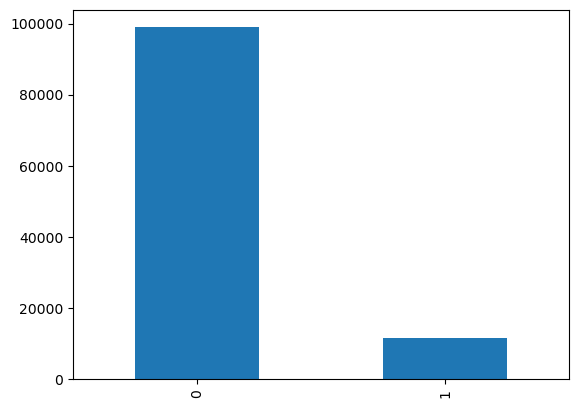

In [63]:
# Online Activity

new.Online_Activity.value_counts().plot(kind = "bar")

In [64]:
new["Category1"] = pd.factorize(new.Category1)[0]
new["Category2"] = pd.factorize(new.Category2)[0]

## Modeling

In [65]:
# Split the Data in Train and Test

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

In [66]:
train.shape, test.shape, newtrain.shape, newtest.shape

((75278, 8), (35249, 8), (75278, 35), (35249, 35))

In [67]:
# Prepare the X and y...
X = newtrain.drop("Target", axis = 1)
y = newtrain.Target
newtest = newtest.drop("Target", axis = 1)

In [69]:
! pip install catboost

     ------------------------------------- 101.0/101.0 MB 17.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [71]:
# Import the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [72]:
# Make a Dictionary of Models and Run them in one go...

def base_models():
    models = dict()
    models["lg"] = LogisticRegression()
    models["tree"] = DecisionTreeClassifier(criterion="entropy")
    models["RF"] = RandomForestClassifier(criterion="entropy")
    models["Adaboost"] = AdaBoostClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["XGB"] = XGBClassifier()
    models["LGBM"] = LGBMClassifier()
    models["cboost"] = CatBoostClassifier()
    return models

In [73]:
# Evaluation Function

def eval_scores(model):
    cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
    scores = cross_val_score(model, X, y, scoring = "roc_auc", cv = cv,
                   error_score="raise", n_jobs=-1)
    return scores

In [75]:
# Build the Models and Generate the Scores

models = base_models()

result, names = list(), list()

for name, model in models.items():
    finalscore = eval_scores(model)
    result.append(finalscore)
    names.append(name)
    print(model)

LogisticRegression()
DecisionTreeClassifier(criterion='entropy')
RandomForestClassifier(criterion='entropy')
AdaBoostClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
LGBMClassifier()


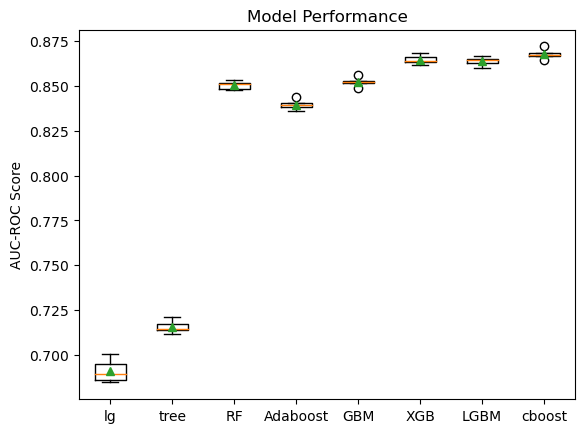

In [76]:
# Visualize the Scores
plt.boxplot(result, labels = names, showmeans=True)
plt.title("Model Performance")
plt.ylabel("AUC-ROC Score")
plt.show()

In [77]:
# XGB, LGBM and CatBoost & Ensemble...

# Xgboost
xgboost = XGBClassifier()

pred_xgb = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgboost.fit(xtrain, ytrain).predict_proba(newtest))

In [78]:
lgbm = LGBMClassifier()

pred_lgbm = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict_proba(newtest))

In [79]:
cboost = CatBoostClassifier()

pred_cboost = []
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain, ytrain).predict_proba(newtest))

Learning rate set to 0.059277
0:	learn: 0.6609470	total: 70.9ms	remaining: 1m 10s
1:	learn: 0.6306795	total: 87.9ms	remaining: 43.9s
2:	learn: 0.6042577	total: 106ms	remaining: 35.4s
3:	learn: 0.5811844	total: 124ms	remaining: 30.8s
4:	learn: 0.5620760	total: 140ms	remaining: 27.9s
5:	learn: 0.5455353	total: 158ms	remaining: 26.1s
6:	learn: 0.5310676	total: 176ms	remaining: 25s
7:	learn: 0.5183504	total: 196ms	remaining: 24.3s
8:	learn: 0.5080489	total: 218ms	remaining: 24s
9:	learn: 0.4989915	total: 238ms	remaining: 23.5s
10:	learn: 0.4910484	total: 256ms	remaining: 23.1s
11:	learn: 0.4840841	total: 274ms	remaining: 22.6s
12:	learn: 0.4777036	total: 291ms	remaining: 22.1s
13:	learn: 0.4722903	total: 311ms	remaining: 21.9s
14:	learn: 0.4671368	total: 328ms	remaining: 21.5s
15:	learn: 0.4619242	total: 348ms	remaining: 21.4s
16:	learn: 0.4574999	total: 368ms	remaining: 21.3s
17:	learn: 0.4539382	total: 388ms	remaining: 21.1s
18:	learn: 0.4504964	total: 411ms	remaining: 21.2s
19:	learn: 0

169:	learn: 0.3975444	total: 3.35s	remaining: 16.4s
170:	learn: 0.3974484	total: 3.37s	remaining: 16.3s
171:	learn: 0.3973913	total: 3.39s	remaining: 16.3s
172:	learn: 0.3972778	total: 3.41s	remaining: 16.3s
173:	learn: 0.3971184	total: 3.42s	remaining: 16.3s
174:	learn: 0.3970052	total: 3.44s	remaining: 16.2s
175:	learn: 0.3968709	total: 3.46s	remaining: 16.2s
176:	learn: 0.3967903	total: 3.48s	remaining: 16.2s
177:	learn: 0.3967240	total: 3.5s	remaining: 16.2s
178:	learn: 0.3965930	total: 3.52s	remaining: 16.1s
179:	learn: 0.3965090	total: 3.54s	remaining: 16.1s
180:	learn: 0.3964409	total: 3.55s	remaining: 16.1s
181:	learn: 0.3963528	total: 3.57s	remaining: 16.1s
182:	learn: 0.3962918	total: 3.59s	remaining: 16s
183:	learn: 0.3962291	total: 3.61s	remaining: 16s
184:	learn: 0.3960944	total: 3.63s	remaining: 16s
185:	learn: 0.3959509	total: 3.65s	remaining: 16s
186:	learn: 0.3958870	total: 3.67s	remaining: 15.9s
187:	learn: 0.3957864	total: 3.68s	remaining: 15.9s
188:	learn: 0.3956891

328:	learn: 0.3824221	total: 6.66s	remaining: 13.6s
329:	learn: 0.3823811	total: 6.68s	remaining: 13.6s
330:	learn: 0.3822951	total: 6.71s	remaining: 13.6s
331:	learn: 0.3821778	total: 6.73s	remaining: 13.5s
332:	learn: 0.3820487	total: 6.75s	remaining: 13.5s
333:	learn: 0.3819831	total: 6.78s	remaining: 13.5s
334:	learn: 0.3818827	total: 6.8s	remaining: 13.5s
335:	learn: 0.3817880	total: 6.82s	remaining: 13.5s
336:	learn: 0.3817293	total: 6.84s	remaining: 13.5s
337:	learn: 0.3816428	total: 6.86s	remaining: 13.4s
338:	learn: 0.3815754	total: 6.88s	remaining: 13.4s
339:	learn: 0.3814804	total: 6.91s	remaining: 13.4s
340:	learn: 0.3814067	total: 6.93s	remaining: 13.4s
341:	learn: 0.3813427	total: 6.95s	remaining: 13.4s
342:	learn: 0.3812567	total: 6.98s	remaining: 13.4s
343:	learn: 0.3812433	total: 7s	remaining: 13.3s
344:	learn: 0.3811705	total: 7.02s	remaining: 13.3s
345:	learn: 0.3810625	total: 7.04s	remaining: 13.3s
346:	learn: 0.3810001	total: 7.06s	remaining: 13.3s
347:	learn: 0.38

495:	learn: 0.3707674	total: 10.2s	remaining: 10.4s
496:	learn: 0.3706967	total: 10.2s	remaining: 10.4s
497:	learn: 0.3706554	total: 10.2s	remaining: 10.3s
498:	learn: 0.3705995	total: 10.3s	remaining: 10.3s
499:	learn: 0.3705241	total: 10.3s	remaining: 10.3s
500:	learn: 0.3704669	total: 10.3s	remaining: 10.3s
501:	learn: 0.3704119	total: 10.3s	remaining: 10.2s
502:	learn: 0.3703608	total: 10.3s	remaining: 10.2s
503:	learn: 0.3703203	total: 10.4s	remaining: 10.2s
504:	learn: 0.3702425	total: 10.4s	remaining: 10.2s
505:	learn: 0.3701592	total: 10.4s	remaining: 10.1s
506:	learn: 0.3700726	total: 10.4s	remaining: 10.1s
507:	learn: 0.3700021	total: 10.4s	remaining: 10.1s
508:	learn: 0.3699418	total: 10.5s	remaining: 10.1s
509:	learn: 0.3698568	total: 10.5s	remaining: 10.1s
510:	learn: 0.3697993	total: 10.5s	remaining: 10s
511:	learn: 0.3697446	total: 10.5s	remaining: 10s
512:	learn: 0.3696569	total: 10.5s	remaining: 9.99s
513:	learn: 0.3695889	total: 10.5s	remaining: 9.97s
514:	learn: 0.36

660:	learn: 0.3610555	total: 13.8s	remaining: 7.06s
661:	learn: 0.3610241	total: 13.8s	remaining: 7.04s
662:	learn: 0.3609669	total: 13.8s	remaining: 7.03s
663:	learn: 0.3609173	total: 13.8s	remaining: 7.01s
664:	learn: 0.3608551	total: 13.9s	remaining: 6.99s
665:	learn: 0.3608281	total: 13.9s	remaining: 6.97s
666:	learn: 0.3607577	total: 13.9s	remaining: 6.95s
667:	learn: 0.3606878	total: 14s	remaining: 6.93s
668:	learn: 0.3606388	total: 14s	remaining: 6.92s
669:	learn: 0.3605985	total: 14s	remaining: 6.9s
670:	learn: 0.3605526	total: 14s	remaining: 6.88s
671:	learn: 0.3604924	total: 14.1s	remaining: 6.86s
672:	learn: 0.3604333	total: 14.1s	remaining: 6.84s
673:	learn: 0.3603713	total: 14.1s	remaining: 6.82s
674:	learn: 0.3602851	total: 14.1s	remaining: 6.8s
675:	learn: 0.3602370	total: 14.2s	remaining: 6.78s
676:	learn: 0.3601837	total: 14.2s	remaining: 6.76s
677:	learn: 0.3601035	total: 14.2s	remaining: 6.74s
678:	learn: 0.3600633	total: 14.2s	remaining: 6.72s
679:	learn: 0.3600285	

828:	learn: 0.3520251	total: 17.5s	remaining: 3.61s
829:	learn: 0.3519799	total: 17.5s	remaining: 3.59s
830:	learn: 0.3519335	total: 17.6s	remaining: 3.57s
831:	learn: 0.3518769	total: 17.6s	remaining: 3.55s
832:	learn: 0.3518151	total: 17.6s	remaining: 3.53s
833:	learn: 0.3517550	total: 17.6s	remaining: 3.51s
834:	learn: 0.3517132	total: 17.6s	remaining: 3.49s
835:	learn: 0.3516738	total: 17.7s	remaining: 3.47s
836:	learn: 0.3516516	total: 17.7s	remaining: 3.45s
837:	learn: 0.3515924	total: 17.7s	remaining: 3.43s
838:	learn: 0.3515823	total: 17.7s	remaining: 3.4s
839:	learn: 0.3515139	total: 17.8s	remaining: 3.38s
840:	learn: 0.3514516	total: 17.8s	remaining: 3.36s
841:	learn: 0.3513953	total: 17.8s	remaining: 3.34s
842:	learn: 0.3513467	total: 17.8s	remaining: 3.32s
843:	learn: 0.3513013	total: 17.9s	remaining: 3.3s
844:	learn: 0.3512507	total: 17.9s	remaining: 3.28s
845:	learn: 0.3511787	total: 17.9s	remaining: 3.26s
846:	learn: 0.3511254	total: 17.9s	remaining: 3.24s
847:	learn: 0.

994:	learn: 0.3441929	total: 20.9s	remaining: 105ms
995:	learn: 0.3441422	total: 20.9s	remaining: 83.9ms
996:	learn: 0.3440858	total: 20.9s	remaining: 63ms
997:	learn: 0.3440770	total: 20.9s	remaining: 42ms
998:	learn: 0.3440339	total: 21s	remaining: 21ms
999:	learn: 0.3439877	total: 21s	remaining: 0us
Learning rate set to 0.059277
0:	learn: 0.6580344	total: 25.4ms	remaining: 25.4s
1:	learn: 0.6286914	total: 53.9ms	remaining: 26.9s
2:	learn: 0.6020133	total: 82.5ms	remaining: 27.4s
3:	learn: 0.5811240	total: 103ms	remaining: 25.6s
4:	learn: 0.5613210	total: 126ms	remaining: 25.1s
5:	learn: 0.5445321	total: 149ms	remaining: 24.7s
6:	learn: 0.5300780	total: 170ms	remaining: 24.1s
7:	learn: 0.5186089	total: 192ms	remaining: 23.8s
8:	learn: 0.5080876	total: 216ms	remaining: 23.8s
9:	learn: 0.4979611	total: 241ms	remaining: 23.8s
10:	learn: 0.4895973	total: 261ms	remaining: 23.4s
11:	learn: 0.4828469	total: 280ms	remaining: 23.1s
12:	learn: 0.4759094	total: 299ms	remaining: 22.7s
13:	learn:

158:	learn: 0.3983217	total: 3.58s	remaining: 18.9s
159:	learn: 0.3982220	total: 3.6s	remaining: 18.9s
160:	learn: 0.3980506	total: 3.62s	remaining: 18.9s
161:	learn: 0.3979436	total: 3.65s	remaining: 18.9s
162:	learn: 0.3978529	total: 3.67s	remaining: 18.9s
163:	learn: 0.3977153	total: 3.69s	remaining: 18.8s
164:	learn: 0.3976523	total: 3.72s	remaining: 18.8s
165:	learn: 0.3975357	total: 3.74s	remaining: 18.8s
166:	learn: 0.3974425	total: 3.77s	remaining: 18.8s
167:	learn: 0.3973694	total: 3.79s	remaining: 18.8s
168:	learn: 0.3973264	total: 3.81s	remaining: 18.7s
169:	learn: 0.3972455	total: 3.83s	remaining: 18.7s
170:	learn: 0.3971202	total: 3.85s	remaining: 18.7s
171:	learn: 0.3970108	total: 3.88s	remaining: 18.7s
172:	learn: 0.3969224	total: 3.9s	remaining: 18.7s
173:	learn: 0.3967533	total: 3.92s	remaining: 18.6s
174:	learn: 0.3966911	total: 3.95s	remaining: 18.6s
175:	learn: 0.3966168	total: 3.97s	remaining: 18.6s
176:	learn: 0.3965644	total: 3.99s	remaining: 18.5s
177:	learn: 0.

325:	learn: 0.3829643	total: 7.36s	remaining: 15.2s
326:	learn: 0.3828662	total: 7.38s	remaining: 15.2s
327:	learn: 0.3827514	total: 7.41s	remaining: 15.2s
328:	learn: 0.3826724	total: 7.43s	remaining: 15.2s
329:	learn: 0.3825525	total: 7.45s	remaining: 15.1s
330:	learn: 0.3824262	total: 7.47s	remaining: 15.1s
331:	learn: 0.3823339	total: 7.5s	remaining: 15.1s
332:	learn: 0.3822561	total: 7.52s	remaining: 15.1s
333:	learn: 0.3821778	total: 7.54s	remaining: 15s
334:	learn: 0.3821655	total: 7.57s	remaining: 15s
335:	learn: 0.3820978	total: 7.59s	remaining: 15s
336:	learn: 0.3820588	total: 7.61s	remaining: 15s
337:	learn: 0.3820058	total: 7.63s	remaining: 14.9s
338:	learn: 0.3819271	total: 7.65s	remaining: 14.9s
339:	learn: 0.3818478	total: 7.67s	remaining: 14.9s
340:	learn: 0.3817676	total: 7.69s	remaining: 14.9s
341:	learn: 0.3817319	total: 7.71s	remaining: 14.8s
342:	learn: 0.3816720	total: 7.73s	remaining: 14.8s
343:	learn: 0.3815926	total: 7.75s	remaining: 14.8s
344:	learn: 0.3814802

489:	learn: 0.3716457	total: 10.7s	remaining: 11.1s
490:	learn: 0.3715681	total: 10.7s	remaining: 11.1s
491:	learn: 0.3715368	total: 10.7s	remaining: 11.1s
492:	learn: 0.3714770	total: 10.7s	remaining: 11s
493:	learn: 0.3714066	total: 10.8s	remaining: 11s
494:	learn: 0.3713473	total: 10.8s	remaining: 11s
495:	learn: 0.3712838	total: 10.8s	remaining: 11s
496:	learn: 0.3712224	total: 10.8s	remaining: 10.9s
497:	learn: 0.3711204	total: 10.8s	remaining: 10.9s
498:	learn: 0.3710612	total: 10.8s	remaining: 10.9s
499:	learn: 0.3709872	total: 10.9s	remaining: 10.9s
500:	learn: 0.3709313	total: 10.9s	remaining: 10.8s
501:	learn: 0.3708439	total: 10.9s	remaining: 10.8s
502:	learn: 0.3707812	total: 10.9s	remaining: 10.8s
503:	learn: 0.3706842	total: 10.9s	remaining: 10.8s
504:	learn: 0.3706326	total: 11s	remaining: 10.7s
505:	learn: 0.3706024	total: 11s	remaining: 10.7s
506:	learn: 0.3705562	total: 11s	remaining: 10.7s
507:	learn: 0.3705025	total: 11s	remaining: 10.7s
508:	learn: 0.3704476	total:

652:	learn: 0.3618246	total: 13.8s	remaining: 7.36s
653:	learn: 0.3617333	total: 13.9s	remaining: 7.33s
654:	learn: 0.3616969	total: 13.9s	remaining: 7.31s
655:	learn: 0.3616574	total: 13.9s	remaining: 7.29s
656:	learn: 0.3615750	total: 13.9s	remaining: 7.27s
657:	learn: 0.3615153	total: 13.9s	remaining: 7.25s
658:	learn: 0.3614443	total: 14s	remaining: 7.22s
659:	learn: 0.3613756	total: 14s	remaining: 7.2s
660:	learn: 0.3613251	total: 14s	remaining: 7.18s
661:	learn: 0.3612639	total: 14s	remaining: 7.16s
662:	learn: 0.3612200	total: 14s	remaining: 7.13s
663:	learn: 0.3611695	total: 14.1s	remaining: 7.11s
664:	learn: 0.3611169	total: 14.1s	remaining: 7.09s
665:	learn: 0.3610406	total: 14.1s	remaining: 7.07s
666:	learn: 0.3609645	total: 14.1s	remaining: 7.04s
667:	learn: 0.3609293	total: 14.1s	remaining: 7.02s
668:	learn: 0.3608740	total: 14.2s	remaining: 7s
669:	learn: 0.3607994	total: 14.2s	remaining: 6.98s
670:	learn: 0.3607452	total: 14.2s	remaining: 6.96s
671:	learn: 0.3606935	tota

811:	learn: 0.3537018	total: 16.9s	remaining: 3.92s
812:	learn: 0.3536465	total: 16.9s	remaining: 3.9s
813:	learn: 0.3536166	total: 17s	remaining: 3.88s
814:	learn: 0.3535909	total: 17s	remaining: 3.85s
815:	learn: 0.3535541	total: 17s	remaining: 3.83s
816:	learn: 0.3535026	total: 17s	remaining: 3.81s
817:	learn: 0.3534401	total: 17s	remaining: 3.79s
818:	learn: 0.3533758	total: 17.1s	remaining: 3.77s
819:	learn: 0.3533246	total: 17.1s	remaining: 3.75s
820:	learn: 0.3532601	total: 17.1s	remaining: 3.72s
821:	learn: 0.3531945	total: 17.1s	remaining: 3.7s
822:	learn: 0.3531402	total: 17.1s	remaining: 3.68s
823:	learn: 0.3530893	total: 17.1s	remaining: 3.66s
824:	learn: 0.3530106	total: 17.2s	remaining: 3.64s
825:	learn: 0.3529715	total: 17.2s	remaining: 3.62s
826:	learn: 0.3529110	total: 17.2s	remaining: 3.6s
827:	learn: 0.3528521	total: 17.2s	remaining: 3.58s
828:	learn: 0.3527946	total: 17.2s	remaining: 3.55s
829:	learn: 0.3527396	total: 17.2s	remaining: 3.53s
830:	learn: 0.3527009	tot

972:	learn: 0.3458412	total: 20.1s	remaining: 557ms
973:	learn: 0.3457824	total: 20.1s	remaining: 537ms
974:	learn: 0.3457404	total: 20.1s	remaining: 516ms
975:	learn: 0.3456917	total: 20.1s	remaining: 495ms
976:	learn: 0.3456329	total: 20.2s	remaining: 475ms
977:	learn: 0.3456098	total: 20.2s	remaining: 454ms
978:	learn: 0.3455816	total: 20.2s	remaining: 433ms
979:	learn: 0.3455389	total: 20.2s	remaining: 413ms
980:	learn: 0.3455114	total: 20.2s	remaining: 392ms
981:	learn: 0.3454371	total: 20.3s	remaining: 371ms
982:	learn: 0.3453698	total: 20.3s	remaining: 351ms
983:	learn: 0.3453076	total: 20.3s	remaining: 330ms
984:	learn: 0.3452633	total: 20.3s	remaining: 309ms
985:	learn: 0.3452066	total: 20.3s	remaining: 289ms
986:	learn: 0.3451395	total: 20.4s	remaining: 268ms
987:	learn: 0.3450855	total: 20.4s	remaining: 247ms
988:	learn: 0.3450454	total: 20.4s	remaining: 227ms
989:	learn: 0.3450185	total: 20.4s	remaining: 206ms
990:	learn: 0.3449846	total: 20.4s	remaining: 186ms
991:	learn: 

141:	learn: 0.4010787	total: 2.92s	remaining: 17.6s
142:	learn: 0.4009900	total: 2.94s	remaining: 17.6s
143:	learn: 0.4008177	total: 2.96s	remaining: 17.6s
144:	learn: 0.4007164	total: 2.98s	remaining: 17.6s
145:	learn: 0.4006232	total: 3s	remaining: 17.6s
146:	learn: 0.4005138	total: 3.02s	remaining: 17.5s
147:	learn: 0.4004061	total: 3.05s	remaining: 17.5s
148:	learn: 0.4002451	total: 3.07s	remaining: 17.5s
149:	learn: 0.4001763	total: 3.09s	remaining: 17.5s
150:	learn: 0.4000524	total: 3.11s	remaining: 17.5s
151:	learn: 0.3999541	total: 3.13s	remaining: 17.4s
152:	learn: 0.3998883	total: 3.15s	remaining: 17.4s
153:	learn: 0.3998212	total: 3.17s	remaining: 17.4s
154:	learn: 0.3997499	total: 3.19s	remaining: 17.4s
155:	learn: 0.3995788	total: 3.21s	remaining: 17.3s
156:	learn: 0.3994895	total: 3.23s	remaining: 17.3s
157:	learn: 0.3993746	total: 3.25s	remaining: 17.3s
158:	learn: 0.3992928	total: 3.27s	remaining: 17.3s
159:	learn: 0.3992157	total: 3.29s	remaining: 17.3s
160:	learn: 0.3

310:	learn: 0.3856102	total: 6.45s	remaining: 14.3s
311:	learn: 0.3855502	total: 6.47s	remaining: 14.3s
312:	learn: 0.3854881	total: 6.49s	remaining: 14.3s
313:	learn: 0.3854299	total: 6.52s	remaining: 14.2s
314:	learn: 0.3853443	total: 6.54s	remaining: 14.2s
315:	learn: 0.3852323	total: 6.56s	remaining: 14.2s
316:	learn: 0.3851325	total: 6.58s	remaining: 14.2s
317:	learn: 0.3850400	total: 6.6s	remaining: 14.2s
318:	learn: 0.3849329	total: 6.62s	remaining: 14.1s
319:	learn: 0.3848616	total: 6.64s	remaining: 14.1s
320:	learn: 0.3847937	total: 6.66s	remaining: 14.1s
321:	learn: 0.3847284	total: 6.68s	remaining: 14.1s
322:	learn: 0.3846336	total: 6.7s	remaining: 14s
323:	learn: 0.3845537	total: 6.72s	remaining: 14s
324:	learn: 0.3844413	total: 6.74s	remaining: 14s
325:	learn: 0.3843744	total: 6.76s	remaining: 14s
326:	learn: 0.3843286	total: 6.78s	remaining: 13.9s
327:	learn: 0.3842915	total: 6.79s	remaining: 13.9s
328:	learn: 0.3842382	total: 6.81s	remaining: 13.9s
329:	learn: 0.3841557	

474:	learn: 0.3733960	total: 10s	remaining: 11.1s
475:	learn: 0.3733236	total: 10.1s	remaining: 11.1s
476:	learn: 0.3732629	total: 10.1s	remaining: 11.1s
477:	learn: 0.3731946	total: 10.1s	remaining: 11s
478:	learn: 0.3731573	total: 10.1s	remaining: 11s
479:	learn: 0.3731006	total: 10.1s	remaining: 11s
480:	learn: 0.3730626	total: 10.2s	remaining: 11s
481:	learn: 0.3729702	total: 10.2s	remaining: 10.9s
482:	learn: 0.3728829	total: 10.2s	remaining: 10.9s
483:	learn: 0.3728167	total: 10.2s	remaining: 10.9s
484:	learn: 0.3727357	total: 10.2s	remaining: 10.9s
485:	learn: 0.3726966	total: 10.3s	remaining: 10.9s
486:	learn: 0.3726305	total: 10.3s	remaining: 10.8s
487:	learn: 0.3725470	total: 10.3s	remaining: 10.8s
488:	learn: 0.3724942	total: 10.3s	remaining: 10.8s
489:	learn: 0.3724182	total: 10.3s	remaining: 10.8s
490:	learn: 0.3723422	total: 10.4s	remaining: 10.7s
491:	learn: 0.3722727	total: 10.4s	remaining: 10.7s
492:	learn: 0.3722070	total: 10.4s	remaining: 10.7s
493:	learn: 0.3721459	

639:	learn: 0.3632734	total: 13.6s	remaining: 7.66s
640:	learn: 0.3632167	total: 13.6s	remaining: 7.64s
641:	learn: 0.3631339	total: 13.7s	remaining: 7.62s
642:	learn: 0.3630923	total: 13.7s	remaining: 7.59s
643:	learn: 0.3630449	total: 13.7s	remaining: 7.57s
644:	learn: 0.3629841	total: 13.7s	remaining: 7.55s
645:	learn: 0.3629116	total: 13.7s	remaining: 7.53s
646:	learn: 0.3628562	total: 13.8s	remaining: 7.51s
647:	learn: 0.3627951	total: 13.8s	remaining: 7.48s
648:	learn: 0.3627254	total: 13.8s	remaining: 7.46s
649:	learn: 0.3626758	total: 13.8s	remaining: 7.44s
650:	learn: 0.3626378	total: 13.8s	remaining: 7.42s
651:	learn: 0.3625715	total: 13.9s	remaining: 7.4s
652:	learn: 0.3624631	total: 13.9s	remaining: 7.38s
653:	learn: 0.3623669	total: 13.9s	remaining: 7.36s
654:	learn: 0.3623242	total: 13.9s	remaining: 7.33s
655:	learn: 0.3622577	total: 13.9s	remaining: 7.31s
656:	learn: 0.3622141	total: 14s	remaining: 7.29s
657:	learn: 0.3621548	total: 14s	remaining: 7.27s
658:	learn: 0.362

803:	learn: 0.3548215	total: 16.9s	remaining: 4.13s
804:	learn: 0.3547694	total: 17s	remaining: 4.11s
805:	learn: 0.3546964	total: 17s	remaining: 4.09s
806:	learn: 0.3546547	total: 17s	remaining: 4.07s
807:	learn: 0.3545947	total: 17s	remaining: 4.04s
808:	learn: 0.3545313	total: 17s	remaining: 4.02s
809:	learn: 0.3544935	total: 17.1s	remaining: 4s
810:	learn: 0.3544239	total: 17.1s	remaining: 3.98s
811:	learn: 0.3544059	total: 17.1s	remaining: 3.96s
812:	learn: 0.3543652	total: 17.1s	remaining: 3.94s
813:	learn: 0.3543148	total: 17.1s	remaining: 3.92s
814:	learn: 0.3543010	total: 17.2s	remaining: 3.9s
815:	learn: 0.3542264	total: 17.2s	remaining: 3.88s
816:	learn: 0.3541626	total: 17.2s	remaining: 3.85s
817:	learn: 0.3541071	total: 17.2s	remaining: 3.83s
818:	learn: 0.3540603	total: 17.2s	remaining: 3.81s
819:	learn: 0.3540281	total: 17.3s	remaining: 3.79s
820:	learn: 0.3539799	total: 17.3s	remaining: 3.77s
821:	learn: 0.3539283	total: 17.3s	remaining: 3.75s
822:	learn: 0.3538809	tota

963:	learn: 0.3472763	total: 20.4s	remaining: 764ms
964:	learn: 0.3472261	total: 20.5s	remaining: 743ms
965:	learn: 0.3471837	total: 20.5s	remaining: 721ms
966:	learn: 0.3471488	total: 20.5s	remaining: 700ms
967:	learn: 0.3471225	total: 20.5s	remaining: 679ms
968:	learn: 0.3471012	total: 20.6s	remaining: 658ms
969:	learn: 0.3470358	total: 20.6s	remaining: 637ms
970:	learn: 0.3469822	total: 20.6s	remaining: 615ms
971:	learn: 0.3469398	total: 20.6s	remaining: 594ms
972:	learn: 0.3468869	total: 20.6s	remaining: 573ms
973:	learn: 0.3468408	total: 20.7s	remaining: 552ms
974:	learn: 0.3467931	total: 20.7s	remaining: 530ms
975:	learn: 0.3467593	total: 20.7s	remaining: 509ms
976:	learn: 0.3467141	total: 20.7s	remaining: 488ms
977:	learn: 0.3466622	total: 20.7s	remaining: 467ms
978:	learn: 0.3466417	total: 20.8s	remaining: 445ms
979:	learn: 0.3466037	total: 20.8s	remaining: 424ms
980:	learn: 0.3465642	total: 20.8s	remaining: 403ms
981:	learn: 0.3465351	total: 20.8s	remaining: 382ms
982:	learn: 

129:	learn: 0.4017432	total: 3.17s	remaining: 21.2s
130:	learn: 0.4015769	total: 3.2s	remaining: 21.2s
131:	learn: 0.4014591	total: 3.22s	remaining: 21.2s
132:	learn: 0.4013181	total: 3.24s	remaining: 21.1s
133:	learn: 0.4012062	total: 3.26s	remaining: 21.1s
134:	learn: 0.4011091	total: 3.28s	remaining: 21s
135:	learn: 0.4009285	total: 3.3s	remaining: 21s
136:	learn: 0.4008840	total: 3.32s	remaining: 20.9s
137:	learn: 0.4007613	total: 3.34s	remaining: 20.9s
138:	learn: 0.4006716	total: 3.37s	remaining: 20.9s
139:	learn: 0.4005637	total: 3.39s	remaining: 20.8s
140:	learn: 0.4004905	total: 3.41s	remaining: 20.8s
141:	learn: 0.4003641	total: 3.43s	remaining: 20.7s
142:	learn: 0.4002470	total: 3.45s	remaining: 20.7s
143:	learn: 0.4000897	total: 3.47s	remaining: 20.6s
144:	learn: 0.3999809	total: 3.49s	remaining: 20.6s
145:	learn: 0.3999417	total: 3.51s	remaining: 20.6s
146:	learn: 0.3998560	total: 3.53s	remaining: 20.5s
147:	learn: 0.3997564	total: 3.55s	remaining: 20.5s
148:	learn: 0.3996

289:	learn: 0.3860047	total: 6.51s	remaining: 15.9s
290:	learn: 0.3859442	total: 6.53s	remaining: 15.9s
291:	learn: 0.3858575	total: 6.55s	remaining: 15.9s
292:	learn: 0.3858270	total: 6.57s	remaining: 15.9s
293:	learn: 0.3856767	total: 6.59s	remaining: 15.8s
294:	learn: 0.3856297	total: 6.62s	remaining: 15.8s
295:	learn: 0.3855463	total: 6.64s	remaining: 15.8s
296:	learn: 0.3854361	total: 6.66s	remaining: 15.8s
297:	learn: 0.3853773	total: 6.68s	remaining: 15.7s
298:	learn: 0.3852681	total: 6.7s	remaining: 15.7s
299:	learn: 0.3852208	total: 6.72s	remaining: 15.7s
300:	learn: 0.3851231	total: 6.75s	remaining: 15.7s
301:	learn: 0.3849741	total: 6.78s	remaining: 15.7s
302:	learn: 0.3848845	total: 6.8s	remaining: 15.6s
303:	learn: 0.3847929	total: 6.82s	remaining: 15.6s
304:	learn: 0.3847072	total: 6.85s	remaining: 15.6s
305:	learn: 0.3845617	total: 6.87s	remaining: 15.6s
306:	learn: 0.3844777	total: 6.89s	remaining: 15.6s
307:	learn: 0.3844122	total: 6.92s	remaining: 15.5s
308:	learn: 0.

457:	learn: 0.3730135	total: 10s	remaining: 11.9s
458:	learn: 0.3729270	total: 10.1s	remaining: 11.9s
459:	learn: 0.3728602	total: 10.1s	remaining: 11.8s
460:	learn: 0.3727891	total: 10.1s	remaining: 11.8s
461:	learn: 0.3726849	total: 10.1s	remaining: 11.8s
462:	learn: 0.3726051	total: 10.1s	remaining: 11.8s
463:	learn: 0.3725331	total: 10.2s	remaining: 11.7s
464:	learn: 0.3724616	total: 10.2s	remaining: 11.7s
465:	learn: 0.3723799	total: 10.2s	remaining: 11.7s
466:	learn: 0.3723165	total: 10.2s	remaining: 11.7s
467:	learn: 0.3722374	total: 10.2s	remaining: 11.7s
468:	learn: 0.3721884	total: 10.3s	remaining: 11.6s
469:	learn: 0.3721375	total: 10.3s	remaining: 11.6s
470:	learn: 0.3720867	total: 10.3s	remaining: 11.6s
471:	learn: 0.3719864	total: 10.3s	remaining: 11.6s
472:	learn: 0.3718956	total: 10.4s	remaining: 11.5s
473:	learn: 0.3718185	total: 10.4s	remaining: 11.5s
474:	learn: 0.3717605	total: 10.4s	remaining: 11.5s
475:	learn: 0.3717003	total: 10.4s	remaining: 11.5s
476:	learn: 0.

625:	learn: 0.3625087	total: 13.5s	remaining: 8.09s
626:	learn: 0.3624671	total: 13.6s	remaining: 8.07s
627:	learn: 0.3623959	total: 13.6s	remaining: 8.04s
628:	learn: 0.3623407	total: 13.6s	remaining: 8.02s
629:	learn: 0.3622655	total: 13.6s	remaining: 8s
630:	learn: 0.3622211	total: 13.6s	remaining: 7.98s
631:	learn: 0.3621537	total: 13.7s	remaining: 7.96s
632:	learn: 0.3620965	total: 13.7s	remaining: 7.93s
633:	learn: 0.3620275	total: 13.7s	remaining: 7.91s
634:	learn: 0.3619666	total: 13.7s	remaining: 7.89s
635:	learn: 0.3618864	total: 13.7s	remaining: 7.87s
636:	learn: 0.3617766	total: 13.8s	remaining: 7.85s
637:	learn: 0.3617221	total: 13.8s	remaining: 7.83s
638:	learn: 0.3616646	total: 13.8s	remaining: 7.8s
639:	learn: 0.3615898	total: 13.8s	remaining: 7.78s
640:	learn: 0.3615392	total: 13.9s	remaining: 7.76s
641:	learn: 0.3614746	total: 13.9s	remaining: 7.74s
642:	learn: 0.3614095	total: 13.9s	remaining: 7.71s
643:	learn: 0.3613716	total: 13.9s	remaining: 7.69s
644:	learn: 0.36

786:	learn: 0.3532345	total: 16.9s	remaining: 4.56s
787:	learn: 0.3532025	total: 16.9s	remaining: 4.54s
788:	learn: 0.3531474	total: 16.9s	remaining: 4.52s
789:	learn: 0.3531077	total: 16.9s	remaining: 4.5s
790:	learn: 0.3530921	total: 16.9s	remaining: 4.48s
791:	learn: 0.3530562	total: 17s	remaining: 4.45s
792:	learn: 0.3530013	total: 17s	remaining: 4.43s
793:	learn: 0.3529410	total: 17s	remaining: 4.41s
794:	learn: 0.3528916	total: 17s	remaining: 4.39s
795:	learn: 0.3528300	total: 17s	remaining: 4.37s
796:	learn: 0.3527821	total: 17.1s	remaining: 4.35s
797:	learn: 0.3527361	total: 17.1s	remaining: 4.33s
798:	learn: 0.3526677	total: 17.1s	remaining: 4.3s
799:	learn: 0.3526083	total: 17.1s	remaining: 4.28s
800:	learn: 0.3525641	total: 17.1s	remaining: 4.26s
801:	learn: 0.3525111	total: 17.2s	remaining: 4.24s
802:	learn: 0.3524554	total: 17.2s	remaining: 4.22s
803:	learn: 0.3524375	total: 17.2s	remaining: 4.19s
804:	learn: 0.3523967	total: 17.2s	remaining: 4.17s
805:	learn: 0.3523435	to

947:	learn: 0.3453859	total: 20.2s	remaining: 1.11s
948:	learn: 0.3453507	total: 20.2s	remaining: 1.08s
949:	learn: 0.3453090	total: 20.2s	remaining: 1.06s
950:	learn: 0.3452316	total: 20.2s	remaining: 1.04s
951:	learn: 0.3451789	total: 20.3s	remaining: 1.02s
952:	learn: 0.3451388	total: 20.3s	remaining: 1000ms
953:	learn: 0.3450766	total: 20.3s	remaining: 979ms
954:	learn: 0.3450565	total: 20.3s	remaining: 957ms
955:	learn: 0.3449920	total: 20.3s	remaining: 936ms
956:	learn: 0.3449609	total: 20.4s	remaining: 915ms
957:	learn: 0.3449394	total: 20.4s	remaining: 893ms
958:	learn: 0.3448954	total: 20.4s	remaining: 872ms
959:	learn: 0.3448427	total: 20.4s	remaining: 851ms
960:	learn: 0.3447973	total: 20.4s	remaining: 829ms
961:	learn: 0.3447573	total: 20.5s	remaining: 808ms
962:	learn: 0.3447272	total: 20.5s	remaining: 787ms
963:	learn: 0.3446774	total: 20.5s	remaining: 765ms
964:	learn: 0.3446487	total: 20.5s	remaining: 744ms
965:	learn: 0.3445929	total: 20.5s	remaining: 723ms
966:	learn:

114:	learn: 0.4028880	total: 2.32s	remaining: 17.8s
115:	learn: 0.4027364	total: 2.34s	remaining: 17.8s
116:	learn: 0.4026036	total: 2.36s	remaining: 17.8s
117:	learn: 0.4024904	total: 2.37s	remaining: 17.7s
118:	learn: 0.4023887	total: 2.39s	remaining: 17.7s
119:	learn: 0.4022946	total: 2.41s	remaining: 17.7s
120:	learn: 0.4021711	total: 2.43s	remaining: 17.6s
121:	learn: 0.4020749	total: 2.45s	remaining: 17.6s
122:	learn: 0.4019219	total: 2.47s	remaining: 17.6s
123:	learn: 0.4018365	total: 2.48s	remaining: 17.6s
124:	learn: 0.4017325	total: 2.5s	remaining: 17.5s
125:	learn: 0.4015651	total: 2.52s	remaining: 17.5s
126:	learn: 0.4013909	total: 2.54s	remaining: 17.5s
127:	learn: 0.4013411	total: 2.56s	remaining: 17.4s
128:	learn: 0.4012309	total: 2.58s	remaining: 17.4s
129:	learn: 0.4010750	total: 2.6s	remaining: 17.4s
130:	learn: 0.4010227	total: 2.61s	remaining: 17.3s
131:	learn: 0.4009584	total: 2.63s	remaining: 17.3s
132:	learn: 0.4008408	total: 2.65s	remaining: 17.2s
133:	learn: 0.

273:	learn: 0.3860127	total: 5.42s	remaining: 14.4s
274:	learn: 0.3859595	total: 5.44s	remaining: 14.4s
275:	learn: 0.3858444	total: 5.46s	remaining: 14.3s
276:	learn: 0.3857557	total: 5.49s	remaining: 14.3s
277:	learn: 0.3856850	total: 5.5s	remaining: 14.3s
278:	learn: 0.3855859	total: 5.52s	remaining: 14.3s
279:	learn: 0.3855010	total: 5.54s	remaining: 14.3s
280:	learn: 0.3853736	total: 5.56s	remaining: 14.2s
281:	learn: 0.3852757	total: 5.58s	remaining: 14.2s
282:	learn: 0.3851626	total: 5.61s	remaining: 14.2s
283:	learn: 0.3851041	total: 5.63s	remaining: 14.2s
284:	learn: 0.3849883	total: 5.65s	remaining: 14.2s
285:	learn: 0.3848912	total: 5.67s	remaining: 14.2s
286:	learn: 0.3848182	total: 5.69s	remaining: 14.1s
287:	learn: 0.3847083	total: 5.71s	remaining: 14.1s
288:	learn: 0.3846298	total: 5.73s	remaining: 14.1s
289:	learn: 0.3845836	total: 5.75s	remaining: 14.1s
290:	learn: 0.3845063	total: 5.77s	remaining: 14.1s
291:	learn: 0.3844324	total: 5.79s	remaining: 14s
292:	learn: 0.3

432:	learn: 0.3737250	total: 8.54s	remaining: 11.2s
433:	learn: 0.3736473	total: 8.56s	remaining: 11.2s
434:	learn: 0.3735680	total: 8.58s	remaining: 11.1s
435:	learn: 0.3734837	total: 8.6s	remaining: 11.1s
436:	learn: 0.3733797	total: 8.62s	remaining: 11.1s
437:	learn: 0.3733270	total: 8.64s	remaining: 11.1s
438:	learn: 0.3732378	total: 8.66s	remaining: 11.1s
439:	learn: 0.3731722	total: 8.69s	remaining: 11.1s
440:	learn: 0.3731232	total: 8.71s	remaining: 11s
441:	learn: 0.3730231	total: 8.73s	remaining: 11s
442:	learn: 0.3729570	total: 8.75s	remaining: 11s
443:	learn: 0.3728989	total: 8.77s	remaining: 11s
444:	learn: 0.3728174	total: 8.79s	remaining: 11s
445:	learn: 0.3727550	total: 8.81s	remaining: 10.9s
446:	learn: 0.3726799	total: 8.82s	remaining: 10.9s
447:	learn: 0.3726147	total: 8.84s	remaining: 10.9s
448:	learn: 0.3725329	total: 8.86s	remaining: 10.9s
449:	learn: 0.3724645	total: 8.88s	remaining: 10.9s
450:	learn: 0.3723908	total: 8.9s	remaining: 10.8s
451:	learn: 0.3723251	to

599:	learn: 0.3627759	total: 12s	remaining: 8.03s
600:	learn: 0.3627266	total: 12.1s	remaining: 8.01s
601:	learn: 0.3626435	total: 12.1s	remaining: 8s
602:	learn: 0.3625747	total: 12.1s	remaining: 7.98s
603:	learn: 0.3625337	total: 12.1s	remaining: 7.96s
604:	learn: 0.3624917	total: 12.2s	remaining: 7.94s
605:	learn: 0.3624400	total: 12.2s	remaining: 7.92s
606:	learn: 0.3623950	total: 12.2s	remaining: 7.9s
607:	learn: 0.3623351	total: 12.2s	remaining: 7.88s
608:	learn: 0.3622746	total: 12.3s	remaining: 7.87s
609:	learn: 0.3621945	total: 12.3s	remaining: 7.85s
610:	learn: 0.3621401	total: 12.3s	remaining: 7.83s
611:	learn: 0.3621191	total: 12.3s	remaining: 7.81s
612:	learn: 0.3620778	total: 12.3s	remaining: 7.79s
613:	learn: 0.3620230	total: 12.4s	remaining: 7.78s
614:	learn: 0.3619740	total: 12.4s	remaining: 7.76s
615:	learn: 0.3619087	total: 12.4s	remaining: 7.74s
616:	learn: 0.3618368	total: 12.4s	remaining: 7.72s
617:	learn: 0.3617917	total: 12.5s	remaining: 7.7s
618:	learn: 0.36174

760:	learn: 0.3540170	total: 15.8s	remaining: 4.97s
761:	learn: 0.3539714	total: 15.9s	remaining: 4.95s
762:	learn: 0.3539197	total: 15.9s	remaining: 4.93s
763:	learn: 0.3538641	total: 15.9s	remaining: 4.91s
764:	learn: 0.3538104	total: 15.9s	remaining: 4.89s
765:	learn: 0.3537558	total: 15.9s	remaining: 4.87s
766:	learn: 0.3536995	total: 16s	remaining: 4.85s
767:	learn: 0.3536623	total: 16s	remaining: 4.83s
768:	learn: 0.3536123	total: 16s	remaining: 4.81s
769:	learn: 0.3535657	total: 16s	remaining: 4.79s
770:	learn: 0.3535463	total: 16.1s	remaining: 4.77s
771:	learn: 0.3534857	total: 16.1s	remaining: 4.75s
772:	learn: 0.3534477	total: 16.1s	remaining: 4.73s
773:	learn: 0.3533842	total: 16.1s	remaining: 4.71s
774:	learn: 0.3533338	total: 16.2s	remaining: 4.69s
775:	learn: 0.3532725	total: 16.2s	remaining: 4.67s
776:	learn: 0.3532192	total: 16.2s	remaining: 4.65s
777:	learn: 0.3531526	total: 16.2s	remaining: 4.63s
778:	learn: 0.3530940	total: 16.3s	remaining: 4.61s
779:	learn: 0.353043

927:	learn: 0.3458776	total: 19.4s	remaining: 1.5s
928:	learn: 0.3458594	total: 19.4s	remaining: 1.48s
929:	learn: 0.3458105	total: 19.4s	remaining: 1.46s
930:	learn: 0.3457704	total: 19.4s	remaining: 1.44s
931:	learn: 0.3457164	total: 19.5s	remaining: 1.42s
932:	learn: 0.3456359	total: 19.5s	remaining: 1.4s
933:	learn: 0.3456093	total: 19.5s	remaining: 1.38s
934:	learn: 0.3455592	total: 19.5s	remaining: 1.36s
935:	learn: 0.3455012	total: 19.6s	remaining: 1.34s
936:	learn: 0.3454508	total: 19.6s	remaining: 1.32s
937:	learn: 0.3454114	total: 19.6s	remaining: 1.29s
938:	learn: 0.3453522	total: 19.6s	remaining: 1.27s
939:	learn: 0.3452911	total: 19.7s	remaining: 1.25s
940:	learn: 0.3452572	total: 19.7s	remaining: 1.23s
941:	learn: 0.3452005	total: 19.7s	remaining: 1.21s
942:	learn: 0.3451427	total: 19.7s	remaining: 1.19s
943:	learn: 0.3450895	total: 19.7s	remaining: 1.17s
944:	learn: 0.3450192	total: 19.8s	remaining: 1.15s
945:	learn: 0.3449757	total: 19.8s	remaining: 1.13s
946:	learn: 0.

In [81]:
one = pd.DataFrame(np.array(pred_cboost)[0])[1]
two = pd.DataFrame(np.array(pred_cboost)[1])[1]
third = pd.DataFrame(np.array(pred_cboost)[2])[1]
four = pd.DataFrame(np.array(pred_cboost)[3])[1]
five = pd.DataFrame(np.array(pred_cboost)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [ ]:
# Submissions

# LGBM
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [ ]:
submission.to_csv("Catboost_Health.csv", index = False) # 0.713

# LGBM - 0.72753 & Cboost - 0.71

In [82]:
from sklearn.ensemble import VotingClassifier
best_models = [("xgboost", xgboost), ("lgbm", lgbm)]

clf = VotingClassifier(estimators=best_models, voting = "soft", n_jobs=-1)

pred_cboost = []

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_cboost.append(clf.fit(xtrain, ytrain).predict_proba(newtest))

In [83]:
one = pd.DataFrame(np.array(pred_cboost)[0])[1]
two = pd.DataFrame(np.array(pred_cboost)[1])[1]
third = pd.DataFrame(np.array(pred_cboost)[2])[1]
four = pd.DataFrame(np.array(pred_cboost)[3])[1]
five = pd.DataFrame(np.array(pred_cboost)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [84]:
# Submissions
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [ ]:
submission.to_csv("VotingClassifier.csv", index = False) # 0.7234

Next Step would be to Tune the Parameters of LGBM....

<AxesSubplot:>

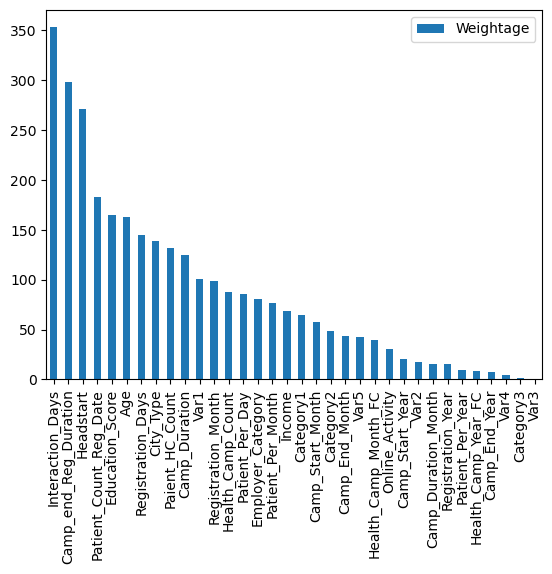

In [85]:
# Feature Importance
pd.DataFrame(lgbm.feature_importances_, lgbm.feature_name_, 
            columns = ["Weightage"]).sort_values(by = "Weightage", 
                                                 ascending = False).plot(kind = "bar")